In [1]:
from platform import python_version
print(python_version()) # tested with 3.7.1
# this adds the python wrapper module directory to the path.
import os
import sys
import numpy as np
import importlib
bindingspath = os.getcwd() + '/../build/python'
sys.path.append(bindingspath)
print(sys.path)

3.7.3
['/home/adria/Documents/Documents/TUM/dlfs/libdl/python', '/home/adria/anaconda3/lib/python37.zip', '/home/adria/anaconda3/lib/python3.7', '/home/adria/anaconda3/lib/python3.7/lib-dynload', '', '/home/adria/anaconda3/lib/python3.7/site-packages', '/home/adria/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/adria/.ipython', '/home/adria/Documents/Documents/TUM/dlfs/libdl/python/../build/python']


In [2]:
# The library wrapper
import pybindings as pyb

In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from skimage import io
imTrain = io.imread(os.getcwd() + '/data/train-volume.tif')
NumImages = 30;
ImageDim = 512 * 512
imsTrain = np.reshape(imTrain, (NumImages, ImageDim)).transpose() 
imsTrain = imsTrain.astype(np.double)/255

lbTrain = io.imread(os.getcwd() + '/data/train-labels.tif')
lbsTrain = np.reshape(lbTrain, (NumImages, ImageDim)).transpose()
enc = OneHotEncoder(categories='auto')
enc.fit(lbsTrain.reshape(-1, 1))
lbsTrainOneHot = np.zeros((ImageDim,NumImages * 2))
for idx in range(0,NumImages):
    lbsTrainOneHot[:,2*idx:(2*idx +2)] = enc.transform(lbsTrain[:,idx].reshape(-1, 1)).toarray()
idx = 0
someIm0 = imsTrain[:,0];
someLb0 = lbsTrain[:,0];
someIm1 = imsTrain[:,1];
someLb1 = lbsTrain[:,1];

In [4]:
print("Values per Image:", imsTrain.shape[0])
print("Number of images for training:", imsTrain.shape[1])

print("Values per  Label Image:", lbsTrainOneHot.shape[0])
print("Number of images for Label training:", lbsTrainOneHot.shape[1])
plt.ion()
inputVar = 30 # change to visualize
while inputVar < 30:
    f = plt.figure(figsize=(20,5))
    f.suptitle('Original image and One Hot Labels', fontsize=16)
    plt.subplot(131)
    plt.imshow(np.reshape(imsTrain[:,inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(132)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar],(512,512)), interpolation='nearest', cmap='gray')
    plt.subplot(133)
    plt.imshow(np.reshape(lbsTrainOneHot[:,2 * inputVar + 1],(512,512)), interpolation='nearest', cmap='gray')
    plt.show()
    inputVar = int(input("Next Index? (Press 30 or larger escape)."))# wait for input from the user

Values per Image: 262144
Number of images for training: 30
Values per  Label Image: 262144
Number of images for Label training: 60


In [5]:
labelDepth = 2
aFirstDepth = 32
aSecondDepth = 64
segSimple = pyb.SegmentationExample7(512,512,1,aFirstDepth,aSecondDepth,labelDepth)

Conv In Depth: 1 In Height: 512 In Width: 512 Out Depth: 32 Out Height: 510 Out Width: 510
Conv In Depth: 32 In Height: 510 In Width: 510 Out Depth: 64 Out Height: 508 Out Width: 508
Tran In Depth: 64 In Height: 508 In Width: 508 Out Depth: 32 Out Height: 510 Out Width: 510
Tran In Depth: 32 In Height: 510 In Width: 510 Out Depth: 2 Out Height: 512 Out Width: 512


In [6]:
segSimple.Train(imsTrain[:,0],lbsTrainOneHot[:,0:2],0.00001,20)
segSimpleOut = segSimple.Test(imsTrain[:,0])

GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
1.04393
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.658285
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532593
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532579
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532577
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532577
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532576
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532576
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532576
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532576
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532576
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532576
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.532576
GetLoss(): +++++++++++++++++++++++++++++++++++++++++++++++++++
0.

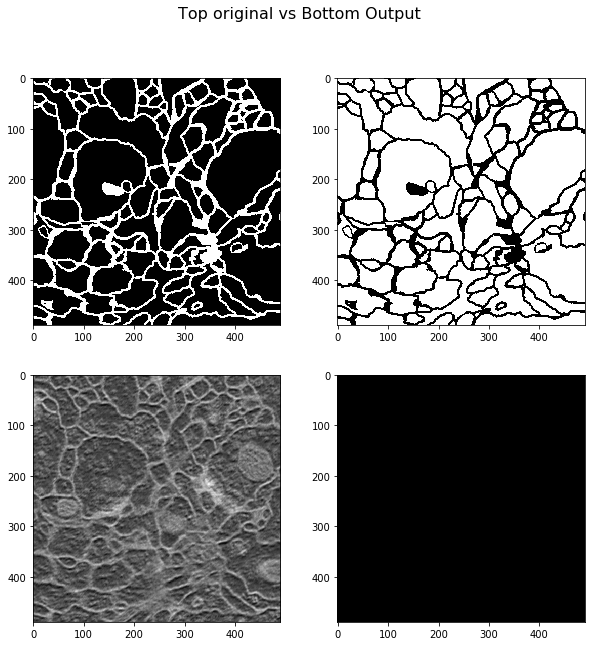

In [9]:
f = plt.figure(figsize=(10,10))
f.suptitle('Top original vs Bottom Output', fontsize=16)
plt.subplot(221)
plt.imshow(np.reshape(lbsTrainOneHot[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(222)
plt.imshow(np.reshape(lbsTrainOneHot[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(223)
plt.imshow(np.reshape(segSimpleOut[:,0],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.subplot(224)
plt.imshow(np.reshape(segSimpleOut[:,1],(512,512))[10:500,10:500], interpolation='nearest', cmap='gray')
plt.show()

In [8]:
segSimpleOut.tolist()

[[0.004351048105957767, 0.9996195982088986],
 [3.4719700317927853e-06, 0.9999999791979346],
 [1.9899174463242928e-09, 0.9999999999979801],
 [2.5126853854099536e-09, 0.9999999999986371],
 [2.4821292355258375e-09, 0.9999999999988418],
 [2.4826735090829774e-09, 0.9999999999988398],
 [2.4906727770082474e-09, 0.9999999999988365],
 [2.496650576367761e-09, 0.9999999999988356],
 [2.5001675375485765e-09, 0.9999999999988363],
 [2.5001416494605522e-09, 0.9999999999988365],
 [2.5021738801211594e-09, 0.9999999999988347],
 [2.502125575211698e-09, 0.9999999999988343],
 [2.5085063827498053e-09, 0.9999999999988343],
 [2.5055133547426903e-09, 0.999999999998834],
 [2.504721534398972e-09, 0.9999999999988338],
 [2.504477088122852e-09, 0.9999999999988352],
 [2.4993483460435256e-09, 0.9999999999988374],
 [2.497520218692099e-09, 0.9999999999988369],
 [2.4934973305575164e-09, 0.9999999999988365],
 [2.4997560805008405e-09, 0.9999999999988358],
 [2.497107477880132e-09, 0.9999999999988365],
 [2.494443057426393e-0